In [1]:
"""
Uso de scikit-learn tiene un paradigma orientado a objetos
scikit-learn tiene tres componentes:
estimadores:
tranformadores
predictores
"""

'\nUso de scikit-learn tiene un paradigma orientado a objetos\nscikit-learn tiene tres componentes:\nestimadores:\ntranformadores\npredictores\n'

In [ ]:
# Video: Introduccion a Scikit-learn

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# se carga el dataset a la variable
data= load_iris()
X = data.data
y = data.target

# Division del dataset en conjuntos de entrenamiento y de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.25, random_state=0)

# se crea una instancia del escalador
scaler = StandardScaler()

# Estimador(StandardScaler): se usa fir para aprender los parametros del escalado
scaler.fit(X_entrena)

# Transformador (StandardScaler): Se aplica la transformacion a los datos de entrenamiento y prueba
X_entrena_escalado  = scaler.transform(X_entrena)
X_prueba_escalado = scaler.transform(X_prueba)

# Se crea una instancia del modelo
modelo = LogisticRegression()

# Estimador(LogisticRegression): Entrenamiento del modelo con los datos escalados
modelo.fit(X_entrena_escalado, y_entrena)

# Predictor (LogisticRegression): Se hacen preddiciones y se evalua el modelo
y_pred = modelo.predict(X_prueba_escalado)
puntaje = modelo.score(X_prueba_escalado, y_prueba)
print(f"Las predicciones son: {y_pred}")
print(f"La precision del modelo es: {puntaje:.2f}")

Las predicciones son: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
La precision del modelo es: 0.97


In [ ]:
# Video: Preprocesamiento de datos en Scikit-Learn

In [26]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import  MinMaxScaler, StandardScaler, OneHotEncoder

In [16]:
data = np.array([[1,-1,2],
               [2,0,0],
               [0,1,-1]])

data

array([[ 1, -1,  2],
       [ 2,  0,  0],
       [ 0,  1, -1]])

In [17]:
scaler = MinMaxScaler(feature_range =(0,1))
data_escalada = scaler.fit_transform(data)
data_escalada

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [18]:
iris = load_iris()
X = iris.data

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
X_escalado = scaler.fit_transform(X)

In [21]:
print(X[:5])
print(X_escalado[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [22]:
scaler= StandardScaler()
data_escalada2 = scaler.fit_transform(data)
data_escalada2

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [23]:
np.std(data_escalada2)

np.float64(1.0)

In [24]:
np.std(data)

np.float64(1.0657403385139377)

In [28]:
# usado para convertir variables categoricas a variables numericas como dias de la semana a numeros
# esta parte es muy util
categorias = np.array([["rojo"], ["verde"],["azul"], ["verde"], ["verde"],["azul"]])
categorias

array([['rojo'],
       ['verde'],
       ['azul'],
       ['verde'],
       ['verde'],
       ['azul']], dtype='<U5')

In [30]:
# usando se evita False se evita que devuelva una matriz dispersa ya que la matriz es muy pequeña
encoder = OneHotEncoder(sparse_output = False)
data_codificada = encoder.fit_transform(categorias)
data_codificada

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [31]:
# video Seccion y division de datos con Scikit-learn

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# para hacer seleccion de caracteristicas de los data sets se usara:
from sklearn.feature_selection import  SelectKBest, SelectFromModel, chi2

data = load_iris()
X = data.data
y = data.target

In [38]:
# Los datos se dividen en conjuntos de entrenamiento y de prueba para poder evaluar las caracteristicas de los
# modelos de aprendizaje automatico
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print("Tamaño del conjunto total:", len(X))
print("Tamaño del conjunto entrenamiento:", len(X_entrena))
print("Tamaño del conjunto prueba:", len(X_prueba))

Tamaño del conjunto total: 150
Tamaño del conjunto entrenamiento: 120
Tamaño del conjunto prueba: 30


In [40]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None
)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value

In [45]:
# en la funcion SelectKBest el numero que sirve para k se usara para quedarse con las caracteristicas que se usaran
# dando prioridad a las mas importantes.
selector = SelectKBest(chi2, k=2)
X_nuevo = selector.fit_transform(X_entrena, y_entrena)

In [47]:
print(X_entrena[:5])
print(X_prueba[:5])
print(X_nuevo[:5])

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
[[1.  0.2]
 [1.5 0.4]
 [4.4 1.4]
 [1.6 0.2]
 [1.3 0.2]]


In [58]:
# con select SelectFromModel
modelo = RandomForestClassifier(n_estimators = 100, random_state=42)
# a diferencia de SelectKBest el modelo SelectFromModel se puede usar sin la variable k pero
# y el numero de variables en k se hara mediante calculos internos del algoritmo. Se puede usar
# threshold sin embargo  es mejor dejar que el algoritmo decida este parametro
selector2 = SelectFromModel(modelo)
X_importante = selector2.fit_transform(X_entrena, y_entrena)

In [59]:
print(X_entrena[:5])
print(X_importante[:5])

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
[[1.  0.2]
 [1.5 0.4]
 [4.4 1.4]
 [1.6 0.2]
 [1.3 0.2]]


In [60]:
# video: Pipelines y automatizacion de flujos de trabajo en Scikit-Learn

In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# se carga el dataset a la variable
data= load_iris()
X = data.data
y = data.target

# Division del dataset en conjuntos de entrenamiento y de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.25, random_state=0)

# se crea una instancia del escalador
scaler = StandardScaler()

# Estimador(StandardScaler): se usa fir para aprender los parametros del escalado
scaler.fit(X_entrena)

# Transformador (StandardScaler): Se aplica la transformacion a los datos de entrenamiento y prueba
X_entrena_escalado  = scaler.transform(X_entrena)
X_prueba_escalado = scaler.transform(X_prueba)

# Se crea una instancia del modelo
modelo = LogisticRegression()

# Estimador(LogisticRegression): Entrenamiento del modelo con los datos escalados
modelo.fit(X_entrena_escalado, y_entrena)

# Predictor (LogisticRegression): Se hacen preddiciones y se evalua el modelo
y_pred = modelo.predict(X_prueba_escalado)
puntaje = modelo.score(X_prueba_escalado, y_prueba)
print(f"Las predicciones son: {y_pred}")
print(f"La precision del modelo es: {puntaje:.2f}")

Las predicciones son: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
La precision del modelo es: 0.97


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Para usar pipelines se usa:
from sklearn.pipeline import make_pipeline

# se carga el dataset a la variable
data= load_iris()
X = data.data
y = data.target

# Division del dataset en conjuntos de entrenamiento y de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.25, random_state=0)

pipeline = make_pipeline(
    StandardScaler(), LogisticRegression()
)

# Pipeline gestiona de manera interna todas las transformaciones
pipeline.fit(X_entrena, y_entrena)

# Predictor (LogisticRegression): Se hacen preddiciones y se evalua el modelo
y_pred = pipeline.predict(X_prueba)
puntaje = pipeline.score(X_prueba, y_prueba)

print(f"Las predicciones son: {y_pred}")
print(f"La precision del modelo es: {puntaje:.2f}")

Las predicciones son: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
La precision del modelo es: 0.97


In [7]:
# Video Evolucion de modelos con scikit-learn

In [11]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [12]:
data = load_iris()
X= data.data
y= data.target

In [13]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

In [14]:
# divide el conjunto de datos en 5 partes o el valor igualado a cv y luego se prueba el modelo 5 veces ya que
# uno de las partes es usada probar la prediccion y el resto para entrenar el modelo
# ejecuta el entrenamiento y la evaluacion
puntajes = cross_val_score(modelo, X, y, cv=5)

In [16]:
print("Exactitud de cada partición:", puntajes)
print("Media de la exactitud:", puntajes.mean())

Exactitud de cada partición: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Media de la exactitud: 0.9666666666666668


In [17]:
# video: Ajuste de hiperparametros con scikit-learn

In [22]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
data = load_iris()
X = data.data
y = data.target

In [24]:
modelo = RandomForestClassifier(random_state=42)

In [25]:
parametros = {
    "n_estimators": [50,100,200],
    "max_features": ["sqrt","log2"],
    "max_depth": [4,5,6,7,8],
    "criterion":["gini","entropy"]
}

In [28]:
mi_grid_search = GridSearchCV(estimator = modelo, param_grid=parametros, cv=5,scoring="accuracy")

In [29]:
mi_grid_search.fit(X,y)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, ...], 'max_features': ['sqrt', 'log2'], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [30]:
# El primer print mostro cuales de los criterios son los mejores para hacer que la presicion del 
# modelo sea lo mas alta posible pero esto cuesta mucho poder computacional por lo que se debe tener
# cuidado con los parametros usados
print("Mejores parametros: ", mi_grid_search.best_params_)
print("Mejor exactitud:", mi_grid_search.best_score_)

Mejores parametros:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}
Mejor exactitud: 0.9666666666666668


In [1]:
# Video: Scikit-Spacial, scikit-Imgage, scikit-time

In [2]:
from skspatial.objects import Point
from skspatial.plotting import plot_2d, plot_3d

(<Figure size 640x480 with 1 Axes>, <Axes: >)

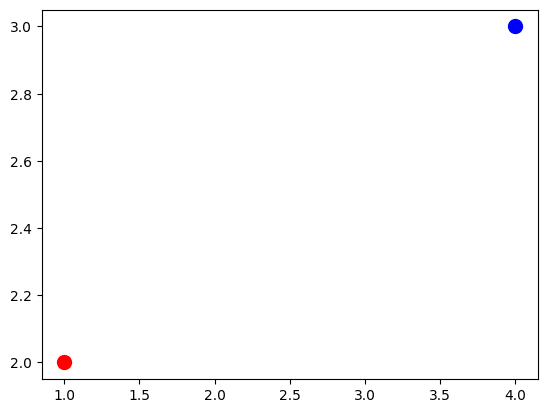

In [4]:
punto1 = Point([1,2])
punto2 = Point([4,3])
plot_2d(
    punto1.plotter(c="r", s=100, label="Punto 1"),
    punto2.plotter(c="b", s=100, label="Punto 2")
)

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

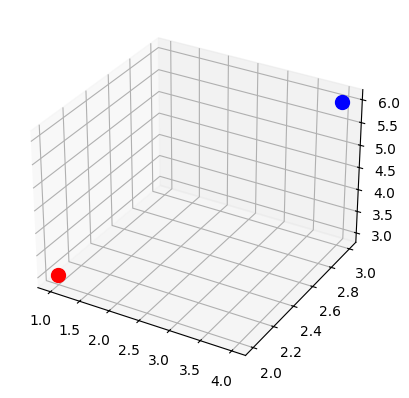

In [6]:
punto1 = Point([1,2,3])
punto2 = Point([4,3,6])
plot_3d(
    punto1.plotter(c="r", s=100, label="Punto 1"),
    punto2.plotter(c="b", s=100, label="Punto 2")
)

In [1]:
import numpy as np
import pandas as pd
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

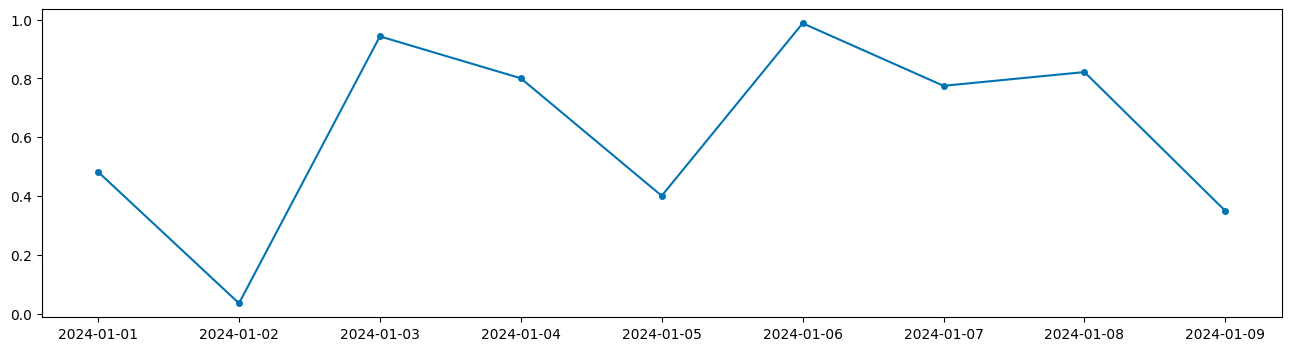

In [2]:
tiempos = pd.date_range(start="2024-01-01", periods=9, freq="D")
valores = np.random.rand(9)
serie_temporal = pd.Series(valores, index=tiempos)
plot_series(serie_temporal)